In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("economic_index.csv")


In [4]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)


In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
#Doing EDA
df.isnull().sum() #checking null values

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

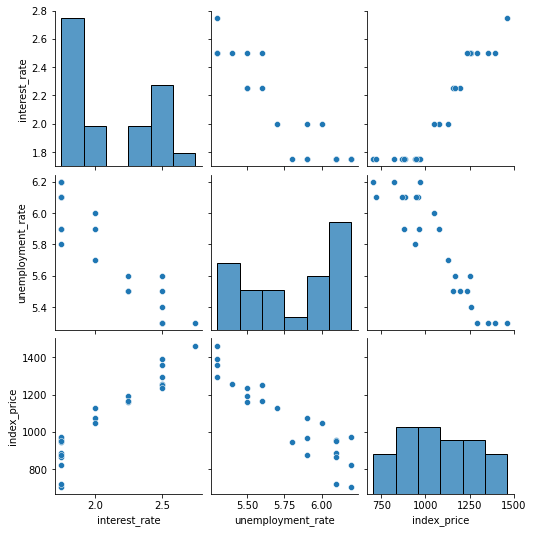

In [7]:
#visualization
import seaborn as sns
sns.pairplot(df) #checking the relationship between independent and dependent variables

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'UnEmployement Rate')

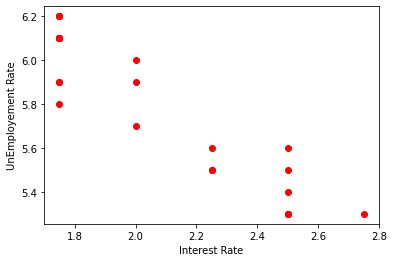

In [9]:
##visualizing the datapoints more closely
plt.scatter(df["interest_rate"],df["unemployment_rate"],color="red")
plt.xlabel("Interest Rate")
plt.ylabel("UnEmployement Rate")

In [10]:
#getting independent and dependent variables
x=df[["interest_rate","unemployment_rate"]]
y=df["index_price"]

In [11]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

C:\Users\Shaikh Salman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

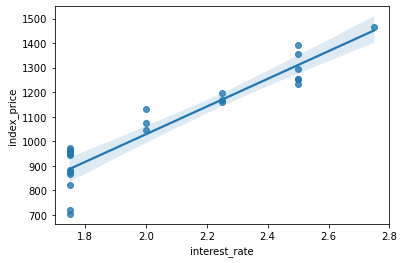

In [15]:
import seaborn as sns
sns.regplot(df["interest_rate"],df["index_price"])

C:\Users\Shaikh Salman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

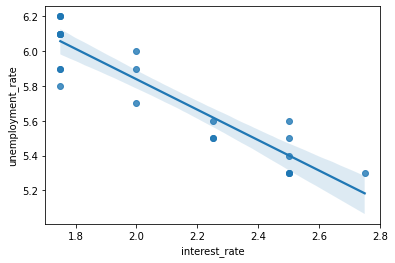

In [16]:
sns.regplot(df["interest_rate"],df["unemployment_rate"])

C:\Users\Shaikh Salman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index_price', ylabel='unemployment_rate'>

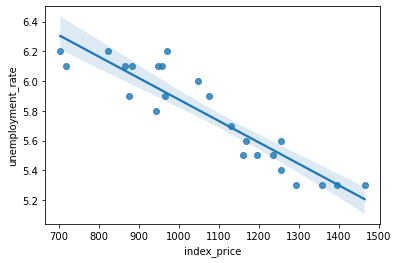

In [17]:
sns.regplot(df["index_price"],df["unemployment_rate"])

In [18]:
#doing standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [21]:
m=lr_model.coef_
m

array([  88.27275507, -116.25716066])

In [22]:
c=lr_model.intercept_
c

1053.4444444444443

In [23]:
#we are introducing the cross validation method through which we can get the good results

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr_model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
validation_score

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [24]:
np.mean(validation_score)

-5649.115244350758

In [25]:
##prediction 
y_pred=lr_model.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [26]:
#now we will do the performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_test,y_pred)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)
adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  5793.762887712583
MAE:  5793.762887712583
RMSE:  76.11677139574815
R2_Score:  0.8278978091457141
adjusted r2 score 0.7131630152428567


In [27]:
###Now we will do Assumption to check whether our model is performing well or not

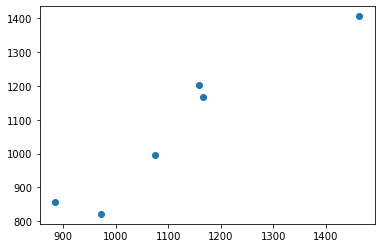

In [28]:
plt.scatter(y_test,y_pred) 

In [29]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


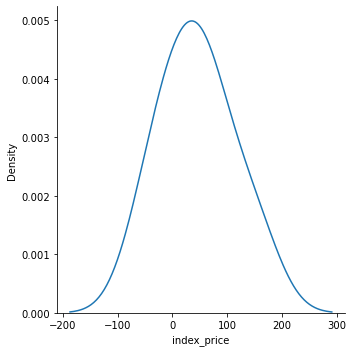

In [30]:
#plotting the residuals
sns.displot(residuals,kind="kde") 

In [31]:
#normal distribution we are getting, i.e its good

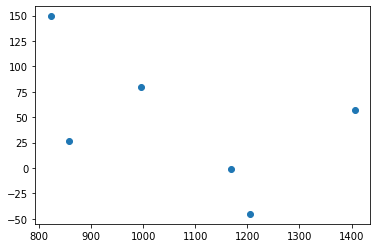

In [32]:
plt.scatter(y_pred,residuals)

In [33]:
#doing the same thing with OLS model
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [34]:
model.summary() #we will get the same values as Linear regression

C:\Users\Shaikh Salman\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                       0.754
Time:                        13:13:05   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#creati

In [35]:
#now we have found that our model is working good now we will create the pickle file
import pickle
with open("lr_model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [41]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [42]:
project_data={"columns":["interest_rate","unemployment_rate"]}
project_data

{'columns': ['interest_rate', 'unemployment_rate']}

In [43]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)

NameError: name 'json' is not defined

In [45]:
x.columns

Index(['interest_rate', 'unemployment_rate'], dtype='object')